###Hw#1, NLP@CGU Spring 2023
***LINK: *paste your link here****
https://colab.research.google.com/drive/14Rsq8nAHRPWEWRsOZHxYcEBGFbIlOCwP?usp=sharing
---

**Student ID**:
B0928001
**Name**:
賴霆瑞

In [17]:
import sys
!{sys.executable} -m pip install jieba
import jieba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
# 讀取文本文件
with open('/content/drive/MyDrive/user_text.txt', 'r', encoding='utf-8') as f:
    content = f.read()

In [91]:
# 去除標點符號
import requests
import string
from zhon.hanzi import punctuation

content = content.replace(' ', '')
content = content.replace('\t', '')
for i in string.punctuation:
    content = content.replace(i, '')
for i in punctuation:
    content = content.replace(i, '')
spacial_punctuation = ['▂', '━', '︴', '←', '┌', '︹', '─', '∷', '﹎', '︺', '☁']
for i in spacial_punctuation:
    content = content.replace(i, '')


In [79]:
### 自定義辭典
jieba.load_userdict(r'/content/drive/MyDrive/dict.txt.big')

In [98]:
### 手動添加語料庫
jieba.add_word('為什麼')

In [101]:
# 切分⽂章（一行算一個文章）
All_articles = content.split('\n')
lines = len(All_articles)
print("⽂章數：", lines)

⽂章數： 418202


In [100]:
### 導入模組
import jieba
from collections import Counter
import pandas as pd
import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

In [103]:
### 使用分詞工具斷詞，使用jieba
tk_articles = []
for articles in All_articles:
    tk_articles.append((jieba.lcut(articles), len(articles)))

In [104]:
### test tokenize result
print(tk_articles[:1])

[(['為什麼', '聖', '結石', '會', '被', '酸', '而', '這群人', '不會', '質感', '劇本', '成員', '都', '差', '很多', '好嗎', '不要', '拿', '腎結石', '來', '污辱', '這群人'], 39)]


In [164]:
### 統計前一百個高頻字詞
high_freq_List = []
Num = 0
for articles in tk_articles:
    counter = Counter(articles[0])
    for item in counter.items():
        high_freq_List.append((Num , item[0], item[1] / articles[1]))
        Num += 1
high_freq_List = sorted(high_freq_List, key=lambda item:item[2], reverse = True)
print(high_freq_List[:10])

[(2766962, '咩', 1.0), (5000790, '人', 1.0), (5748340, '人', 1.0), (1765316, '啦', 0.9), (2788465, '噢', 0.8636363636363636), (1042690, '喔', 0.8181818181818182), (1428267, '鞥', 0.8), (2434098, '欸', 0.8), (1646565, '欸', 0.7916666666666666), (5338991, '欸', 0.7894736842105263)]


In [165]:
### 統計前一百個TF-IDF權重高的字詞
## 先計算IDF
IDF_List = {}
for articles in tk_articles:
    counter = Counter(articles[0])
    for item in counter.items():
        pre_idf = IDF_List.get(item[0])
        if pre_idf:
            IDF_List.update({item[0]: pre_idf + item[1]})
        else:
            IDF_List[item[0]] = item[1]
for IDF in IDF_List.items():
    IDF_List[IDF[0]] = math.log(lines / IDF[1], 10)

# 依照IDF權重排列
IDFs = sorted(IDF_List.items(), key=lambda item:item[1], reverse=True)
IDFs = IDFs
TPK100_IDF = {}
for lt in IDFs:
    TPK100_IDF[lt[0]] = lt[1]

In [166]:
### 計算TF-IDF
tf_idf_List = []
for item in high_freq_List:
    tf_idf_List.append((item[0], item[1], item[2] * IDF_List[item[1]]))
tf_idf_List = sorted(tf_idf_List, key=lambda item:item[2], reverse=True)
print(tf_idf_List[:10])

[(1428267, '鞥', 3.365130205980905), (2788465, '噢', 3.0349702990992062), (652983, '龘', 2.9055784426779128), (1069996, '〩', 2.8681863509251344), (2766962, '咩', 2.84541177431758), (491809, '▍', 2.672389233534843), (4150644, '卍', 2.661785306647562), (1743947, '嫑', 2.4953122962012055), (3117662, '吖', 2.4247062798497816), (5838561, 'あ', 2.310320456282883)]


In [156]:
plt.rcParams['font.sans-serif'] = ['SimHei']
import warnings
warnings.filterwarnings("ignore", message="Glyph .* missing from current font.")


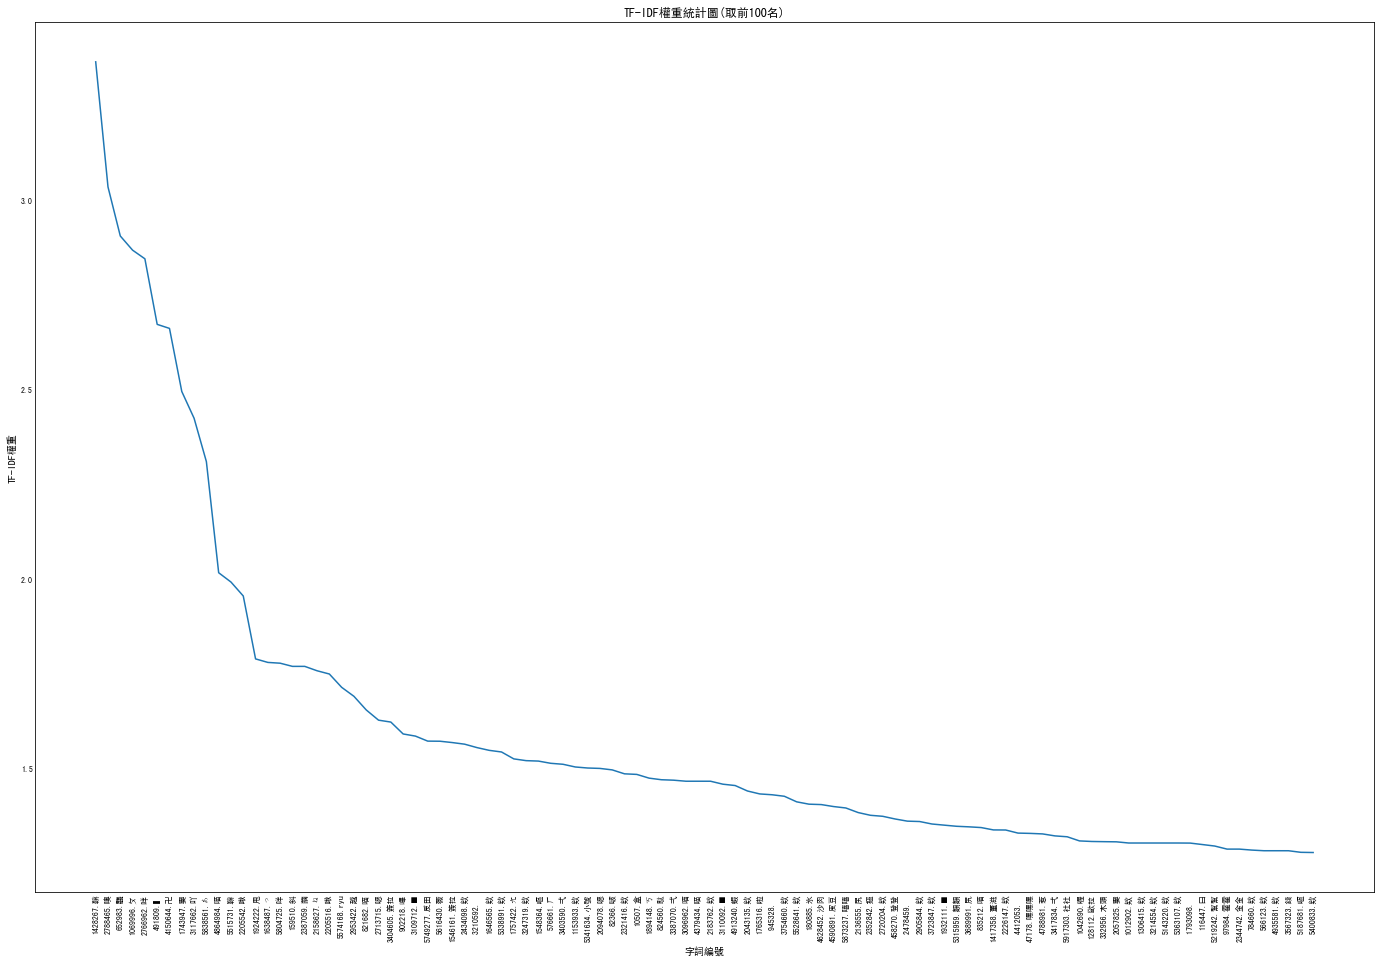

In [169]:
# TF-IDF權重統計圖
x_axis = []
y_axis = []

for item in tf_idf_List[:100]:
    x_axis.append(str(item[0]) + '.' + item[1])
    y_axis.append(item[2])

plt.figure(figsize = (24,16))
plt.plot(x_axis, y_axis)
plt.title("TF-IDF權重統計圖(取前100名)")
plt.xlabel("字詞編號")
plt.xticks(rotation = 90)
plt.ylabel("TF-IDF權重")
plt.show()


Text(0, 0.5, 'TF')

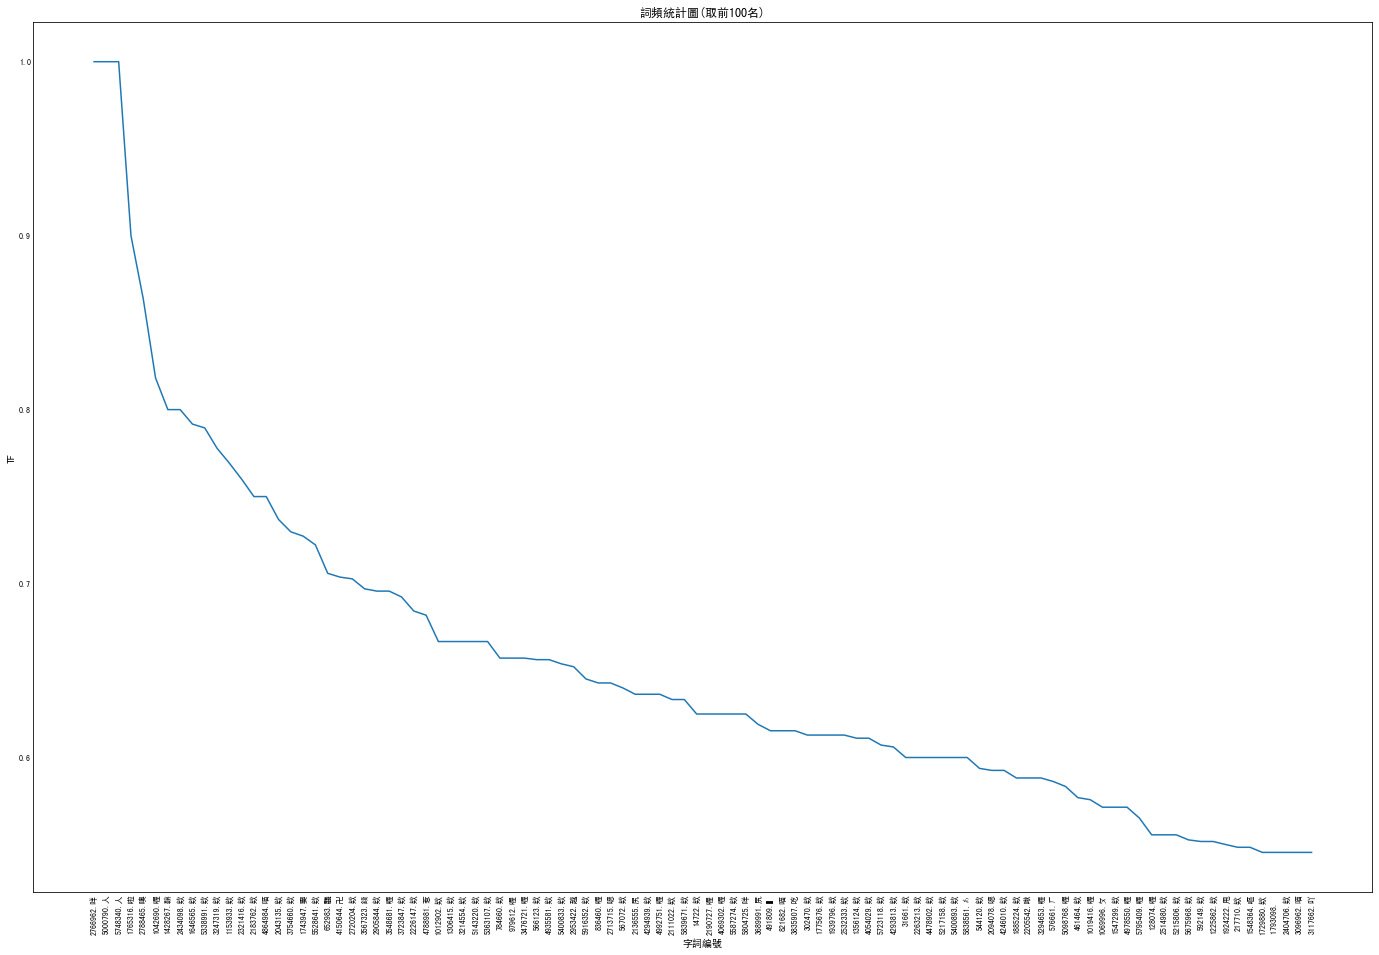

In [170]:
## 詞頻統計圖
x_axis = []
y_axis = []

for item in high_freq_List[:100]:
    x_axis.append(str(item[0]) + '.' + item[1])
    y_axis.append(item[2])

plt.figure(figsize = (24,16))
plt.plot(x_axis, y_axis)
plt.title("詞頻統計圖(取前100名)")
plt.xlabel("字詞編號")
plt.xticks(rotation = 90)
plt.ylabel("TF")

{'1.咩': 1.0, '2.人': 1.0, '3.人': 1.0, '4.啦': 0.9, '5.噢': 0.8636363636363636, '6.喔': 0.8181818181818182, '7.鞥': 0.8, '8.欸': 0.8, '9.欸': 0.7916666666666666, '10.欸': 0.7894736842105263, '11.欸': 0.7777777777777778, '12.欸': 0.7692307692307693, '13.欸': 0.76, '14.欸': 0.75, '15.喵': 0.75, '16.欸': 0.7368421052631579, '17.欸': 0.7297297297297297, '18.嫑': 0.7272727272727273, '19.欸': 0.7222222222222222, '20.龘': 0.7058823529411765, '21.卍': 0.7037037037037037, '22.欸': 0.7027027027027027, '23.錢': 0.696969696969697, '24.欸': 0.6956521739130435, '25.喔': 0.6956521739130435, '26.欸': 0.6923076923076923, '27.欸': 0.6842105263157895, '28.惹': 0.6818181818181818, '29.欸': 0.6666666666666666, '30.欸': 0.6666666666666666, '31.欸': 0.6666666666666666, '32.欸': 0.6666666666666666}


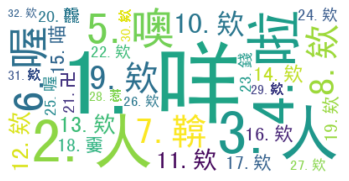

In [175]:
### 製作取前32個文字雲 (Frequency) fig#3
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import jieba
import jieba.analyse
from collections import Counter # 次數統計

dictfile = r"/content/drive/MyDrive/dict.txt.big"  # 字典檔
stopfile = r"/content/drive/MyDrive/stop_words.htm"  # stopwords
fontpath = r"/content/drive/MyDrive/SimHei.ttf"  # 字型檔

jieba.set_dictionary(dictfile)
jieba.analyse.set_stop_words(stopfile)

X = 1
freq = {}
for l in high_freq_List[:32]:
    freq[str(X) + '.' + l[1]] = l[2]
    X += 1
print(freq) # 計算出現的次數

wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', font_path= fontpath).generate_from_frequencies(freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

{'1.鞥': 3.365130205980905, '2.噢': 3.0349702990992062, '3.龘': 2.9055784426779128, '4.〩': 2.8681863509251344, '5.咩': 2.84541177431758, '6.▍': 2.672389233534843, '7.卍': 2.661785306647562, '8.嫑': 2.4953122962012055, '9.吖': 2.4247062798497816, '10.あ': 2.310320456282883, '11.喵': 2.0170649930390825, '12.鞥': 1.992511306172904, '13.啾': 1.955718185403187, '14.甩': 1.7897166014315116, '15.っ': 1.7804295280160958, '16.咩': 1.7783823589484875, '17.斜': 1.7700104621197181, '18.繭': 1.7700104621197181, '19.ね': 1.7584417566850175, '20.啾': 1.7498531132554829, '21.ryu': 1.7147549502424289, '22.越': 1.6909662083180943, '23.喵': 1.6550276865961702, '24.噁': 1.6280624203199645, '25.簽拉': 1.62305509209904, '26.嗶': 1.591681102848306, '27.■': 1.5860286709747649, '28.反田': 1.5727653728183348, '29.薇': 1.572476010167374, '30.簽拉': 1.5689532556957388, '31.欸': 1.564719139731311, '32.ﶝ': 1.5557145320025412}


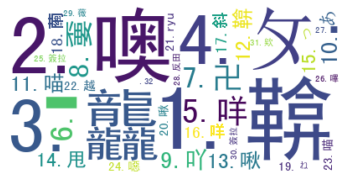

In [176]:
### 製作取前32個文字雲 (TF-IDF) fig#3
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import jieba
import jieba.analyse
from collections import Counter # 次數統計

dictfile = r"/content/drive/MyDrive/dict.txt.big"  # 字典檔
stopfile = r"/content/drive/MyDrive/stop_words.htm"  # stopwords
fontpath = r"/content/drive/MyDrive/SimHei.ttf"  # 字型檔

jieba.set_dictionary(dictfile)
jieba.analyse.set_stop_words(stopfile)

X = 1
freq = {}
for l in tf_idf_List[:32]:
    freq[str(X) + '.' + l[1]] = l[2]
    X += 1
print(freq) # 計算出現的次數

wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', font_path= fontpath).generate_from_frequencies(freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()